In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [32]:
input_path = '../trends_data/normal_trends_outofdublers_norm_graded.pkl'
df_raw = pd.read_pickle(input_path)
df_raw.head()

,importance,k,trend_lenght,r_squared_of_trend,tops_count,peaks_count,height_pic,trend_H,trend_touching_std,trend_touching_mean,...,peaks_height_max,tops_HW_ratio_std,tops_HW_ratio_mean,tops_HW_ratio_median,peaks_HW_ratio_std,peaks_HW_ratio_mean,peaks_HW_ratio_median,trend_lenght_high_ratio,average_grade,waste-nonwaste
0,0.362762,0.939296,0.062854,0.891067,0.000000,0.000000,0.749815,0.900681,0.823408,0.747133,...,0.249311,0.310307,0.213759,0.223136,0.259724,0.251670,0.259787,0.776333,0,0
1,0.264889,0.937419,0.120543,0.893627,0.000000,0.000000,0.757643,0.906592,0.880575,0.767512,...,0.276306,0.428146,0.256695,0.252376,0.293683,0.261490,0.268221,0.741484,0,0
2,0.112761,0.924043,0.182156,0.893376,0.000000,0.000000,0.758449,0.902071,0.948428,0.799338,...,0.328044,0.361205,0.265999,0.295312,0.341495,0.326796,0.346738,0.698488,0,0
3,0.034687,0.937709,0.260393,0.897641,0.000000,0.000000,0.758449,0.925534,0.409728,0.983915,...,0.456882,0.537052,0.399462,0.428841,0.546488,0.481855,0.429200,0.643111,0,0
4,0.345340,0.965908,0.118055,0.883959,0.301768,0.310183,0.778330,0.933407,0.952615,0.732617,...,0.214327,0.455264,0.305480,0.313362,0.403538,0.333323,0.291318,0.759062,0,0


In [33]:
plt.style.use("dark_background")

In [34]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

In [35]:
sns.set_style("whitegrid")

In [36]:
sns.set_style('darkgrid', {'figure.facecolor': 'black',
                          'grid.color': 'purple',
                          'axes.facecolor': '#2E2157',
                          'text.color': 'C0C0C0',
                          'axes.labelcolor': 'C0C0C0',
                          'patch.edgecolor': 'C0C0C0',
                          'xtick.color': 'C0C0C0',
                          'ytick.color': 'C0C0C0'})

retrowave = ['#F706CF', '#F9C80E', "#16d7ea"]
sns.set_palette(retrowave)

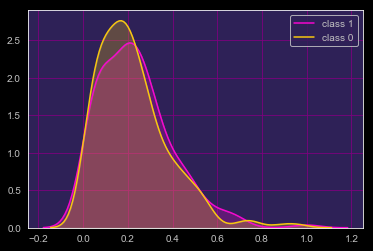

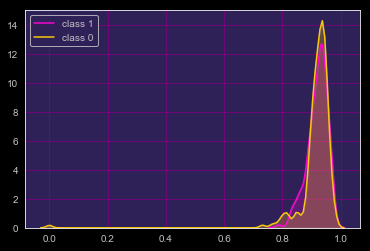

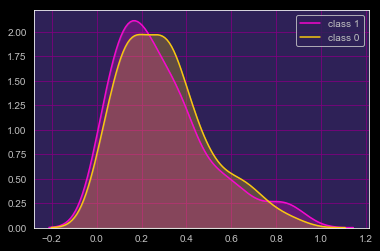

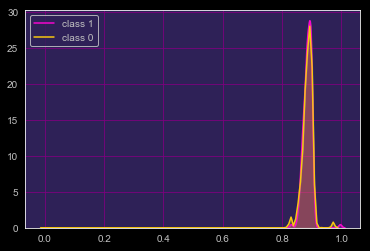

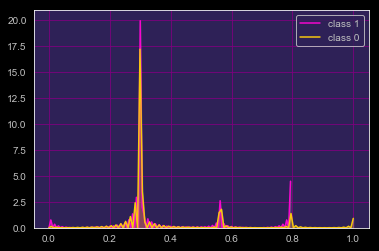

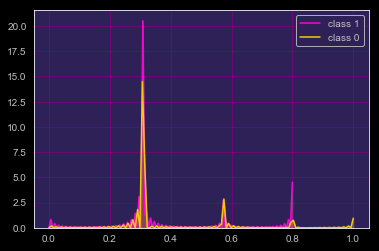

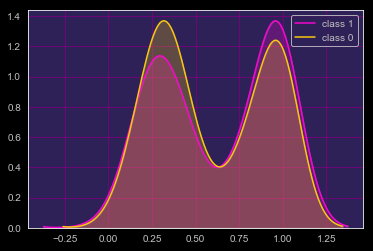

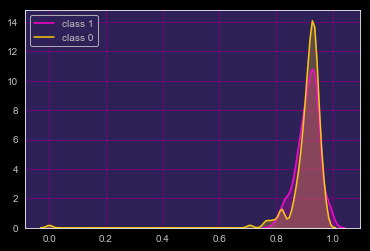

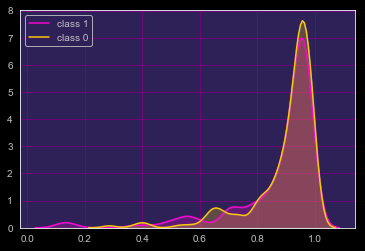

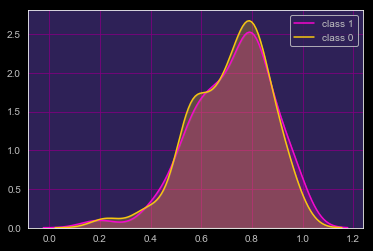

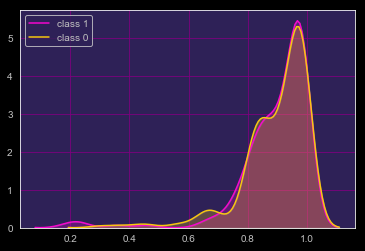

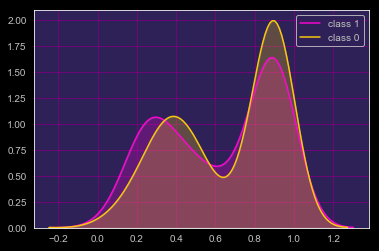

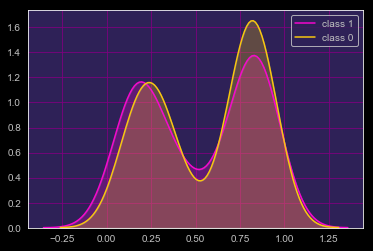

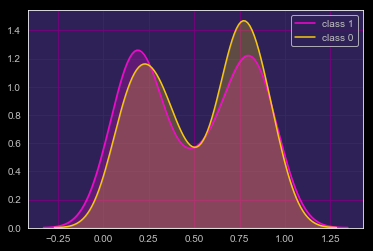

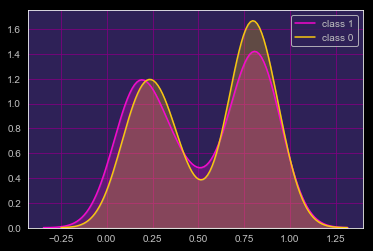

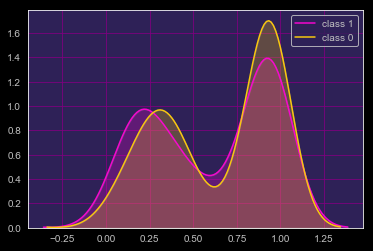

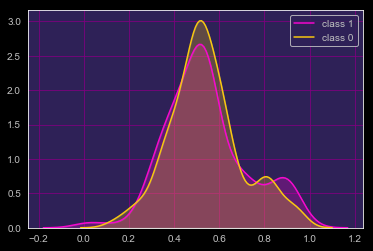

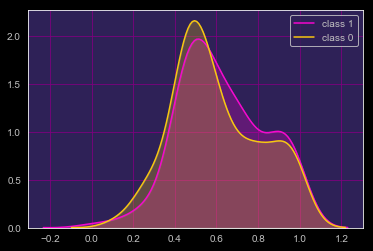

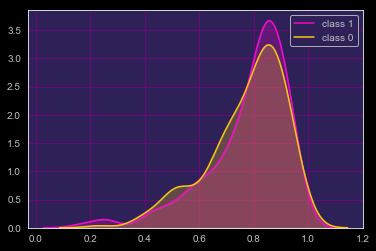

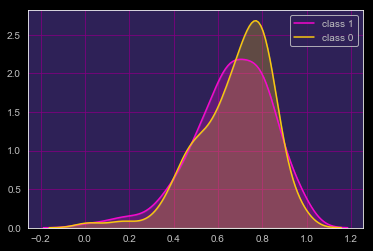

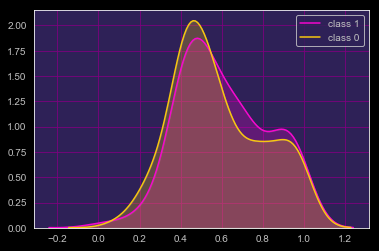

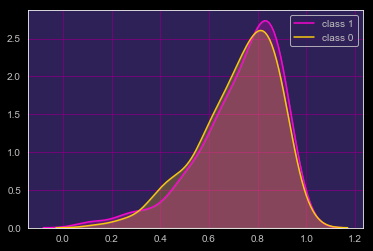

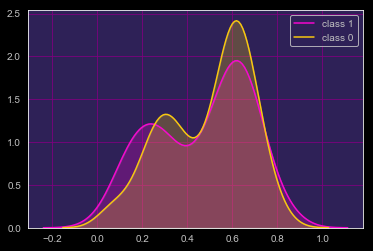

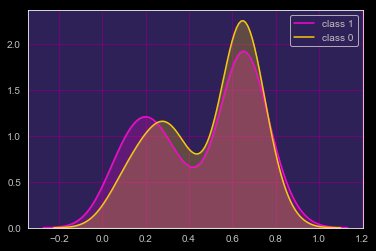

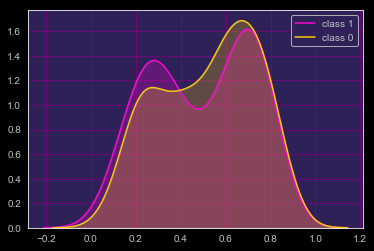

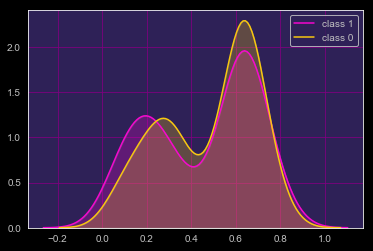

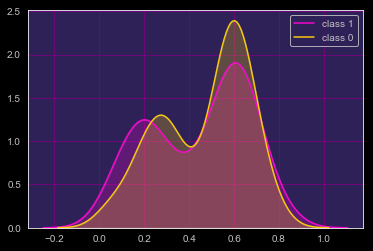

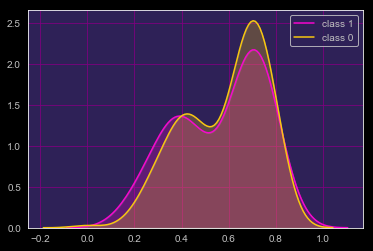

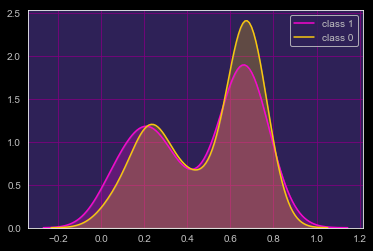

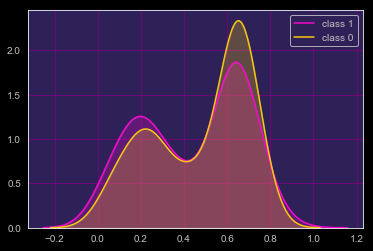

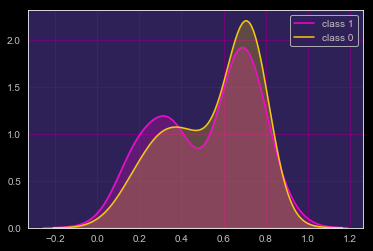

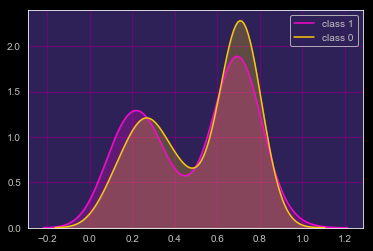

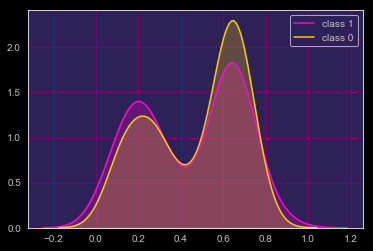

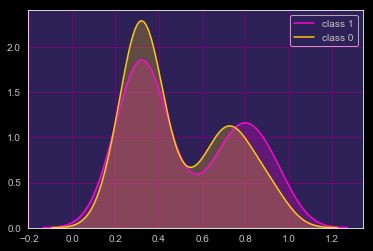

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


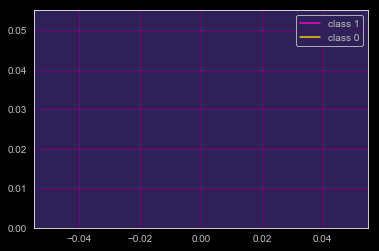

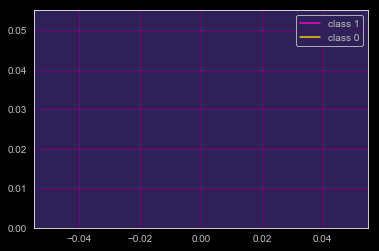

In [45]:
df = df_raw[df_raw['waste-nonwaste'] == 0]
df0 = df[df['average_grade'] == 0]
df1 = df[df['average_grade'] == 1]
for col in df.columns:
    sns.kdeplot(df1[col], shade=True, color='#F706CF', label='class 1')
    sns.kdeplot(df0[col], shade=True,  color='#F9C80E', label='class 0')
    plt.show()

In [46]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [47]:
df.columns

Index(['importance', 'k', 'trend_lenght', 'r_squared_of_trend', 'tops_count',
       'peaks_count', 'height_pic', 'trend_H', 'trend_touching_std',
       'trend_touching_mean', 'trend_touching_median', 'tops_height_std',
       'tops_height_mean', 'tops_height_median', 'tops_height_sum',
       'tops_height_max', 'peaks_width_std', 'peaks_width_mean',
       'peaks_width_median', 'tops_width_std', 'tops_width_mean',
       'tops_width_median', 'peaks_height_std', 'peaks_height_mean',
       'peaks_height_median', 'peaks_height_sum', 'peaks_height_max',
       'tops_HW_ratio_std', 'tops_HW_ratio_mean', 'tops_HW_ratio_median',
       'peaks_HW_ratio_std', 'peaks_HW_ratio_mean', 'peaks_HW_ratio_median',
       'trend_lenght_high_ratio', 'average_grade', 'waste-nonwaste'],
      dtype='object')

In [48]:
x = df[['tops_count', 'peaks_count', 'trend_touching_std',
       'trend_touching_mean', 'trend_touching_median', 'tops_height_std',
       'tops_height_mean', 'tops_height_median', 'tops_height_sum',
       'tops_height_max', 'peaks_width_std', 'peaks_width_mean',
       'peaks_width_median', 'tops_width_std', 'tops_width_mean',
       'tops_width_median', 'peaks_height_std', 'peaks_height_mean',
       'peaks_height_median', 'peaks_height_sum', 'peaks_height_max',
       'tops_HW_ratio_std', 'tops_HW_ratio_mean', 'tops_HW_ratio_median',
       'peaks_HW_ratio_std', 'peaks_HW_ratio_mean', 'peaks_HW_ratio_median',
       'trend_lenght_high_ratio']]
y = df[['average_grade']]

In [49]:
x.shape

(404, 28)

In [50]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)


In [51]:
pca = PCA(0.99)
principalComponents = pca.fit_transform(scaled_x)
principalDf = pd.DataFrame(data = principalComponents
#             , columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5']
                          )
finalDf = pd.merge(principalDf, y, right_index=True, left_index=True)

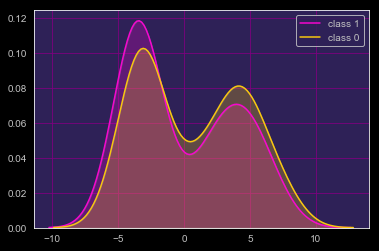

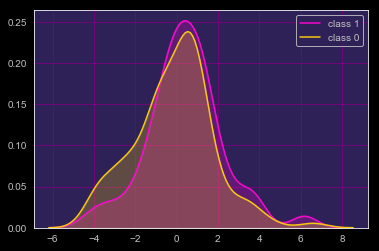

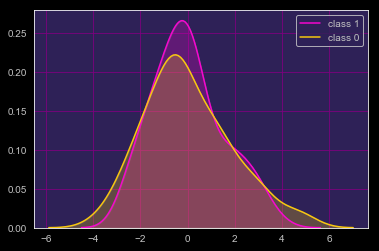

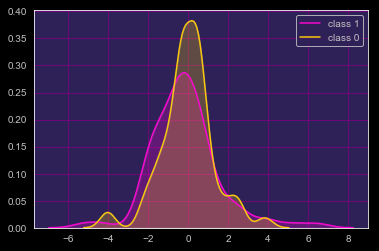

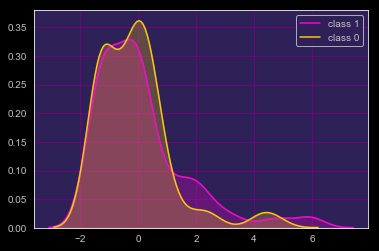

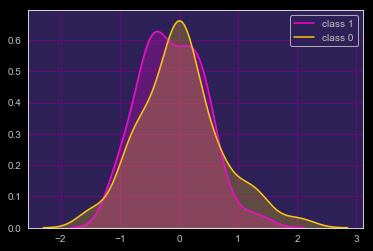

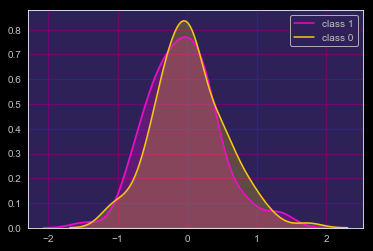

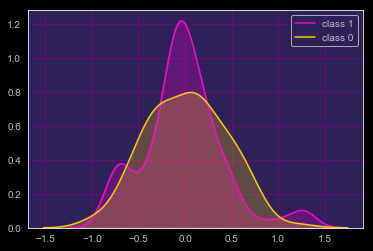

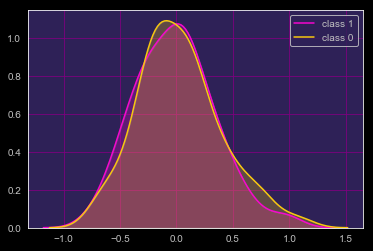

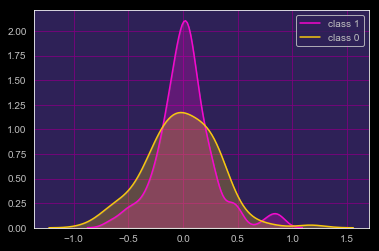

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


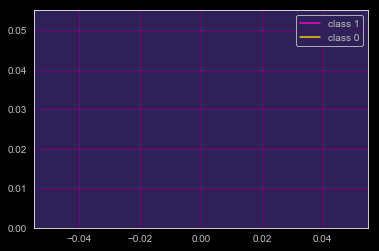

In [52]:
df0 = finalDf[finalDf['average_grade'] == 0]
df1 = finalDf[finalDf['average_grade'] == 1]
for col in finalDf.columns:
    sns.kdeplot(df1[col], shade=True, color='#F706CF', label='class 1')
    sns.kdeplot(df0[col], shade=True,  color='#F9C80E', label='class 0')
    plt.show()